# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata , on='Mouse ID', how='left')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = merged_data['Mouse ID'].value_counts()
mouse_count

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
# clean_mouse_count = cleaned_data['Mouse ID'].value_counts()
# clean_mouse_count
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = cleaned_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()

regimen_median = cleaned_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()

regimen_variance = cleaned_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()

regimen_std = cleaned_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()

regimen_sem = cleaned_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

regimen_statsdf = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
regimen_statsdf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

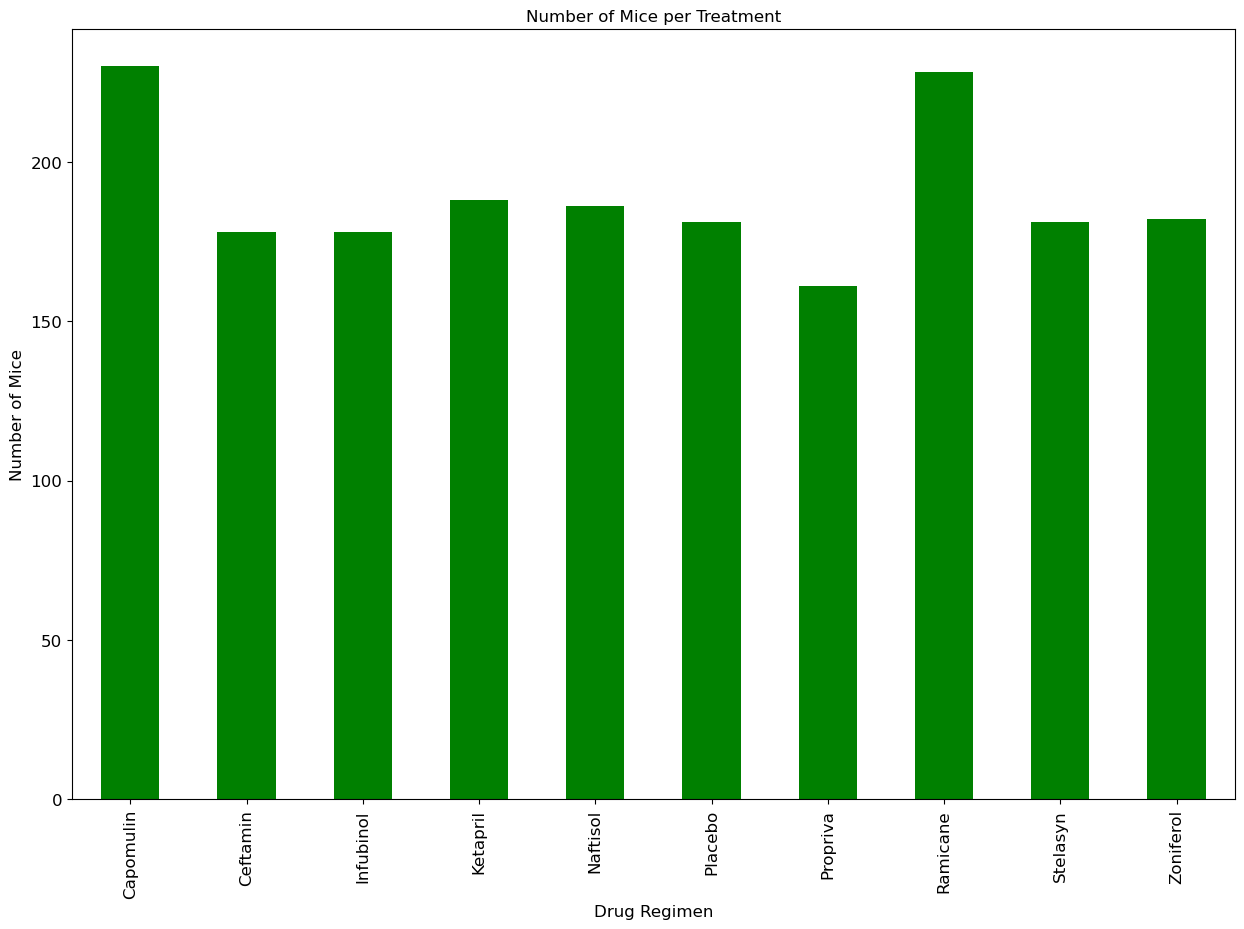

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_treatment = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_mice = mice_per_treatment.plot.bar(figsize=(15,10), color='g', fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment", fontsize=12)
plt.tight_layout
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


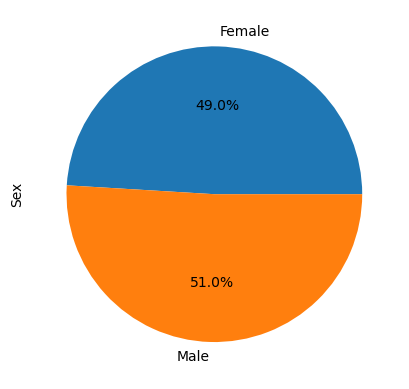

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = cleaned_data.groupby("Sex")
sex_count = sex_df["Sex"].count()
sex_plot = sex_count.plot(kind = "pie", autopct="%1.1f%%")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

ID_time = merged_data.groupby("Mouse ID")
max_last_time = ID_time["Timepoint"].max()
last_time_df = pd.DataFrame(max_last_time)
tumor_volume_df = pd.merge(last_time_df, merged_data, on = ["Mouse ID", "Timepoint"])
tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulin_vol = []
ramicane_vol = []
infubinol_vol = []
ceftamin_vol = []


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

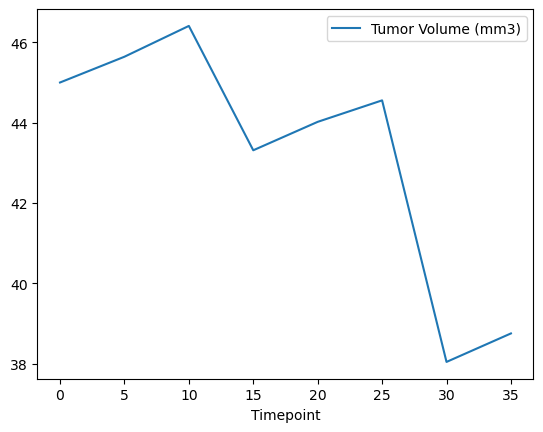

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"]
j246_mouse = merged_data.loc[merged_data["Mouse ID"]=="j246"]


# lineplot
lineplot = j246_mouse.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")

<function matplotlib.pyplot.show(close=None, block=None)>

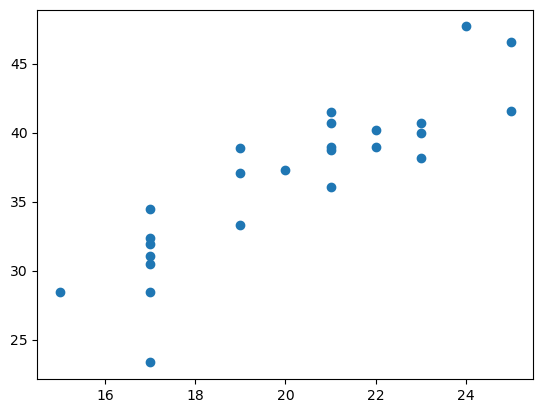

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
average_capomulin = Capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = Capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, average_capomulin)
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
